# Анализ главных компонент

**PCA** — это метод понижения размерности, который используется для уменьшения количества переменных в данных, сохраняя при этом как можно больше информации. Основная цель PCA — найти новые переменные (главные компоненты), которые представляют собой линейные комбинации исходных переменных и объясняют наибольшую долю вариации в данных. Это своего рода метод компрессии данных, который часто используется перед тем, как перейти к задачам классификации или кластеризации.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
# Загрузка данных
iris = load_iris()
X = iris.data

In [3]:
# 1. Центрирование данных
mean_vector = np.mean(X, axis=0)
centered_data = X - mean_vector

In [4]:
# 2. Вычисление ковариационной матрицы
cov_matrix = np.cov(centered_data, rowvar=False)

In [5]:
# 3. Вычисление собственных векторов и собственных значений
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

In [6]:
# 4. Сортировка собственных значений и выбор главных компонент
sorted_indices = np.argsort(eigen_values)[::-1]
sorted_eigenvalues = eigen_values[sorted_indices]
sorted_eigenvectors = eigen_vectors[:, sorted_indices]

# Выбор двух главных компонент
n_components = 2
selected_eigenvectors = sorted_eigenvectors[:, :n_components]

In [7]:
# 5. Преобразование данных в пространство главных компонент
transformed_data = np.dot(centered_data, selected_eigenvectors)

# Оценка уменьшения веса данных
original_size = X.nbytes
transformed_size = transformed_data.nbytes
size_reduction = original_size - transformed_size
percentage_reduction = (size_reduction / original_size) * 100

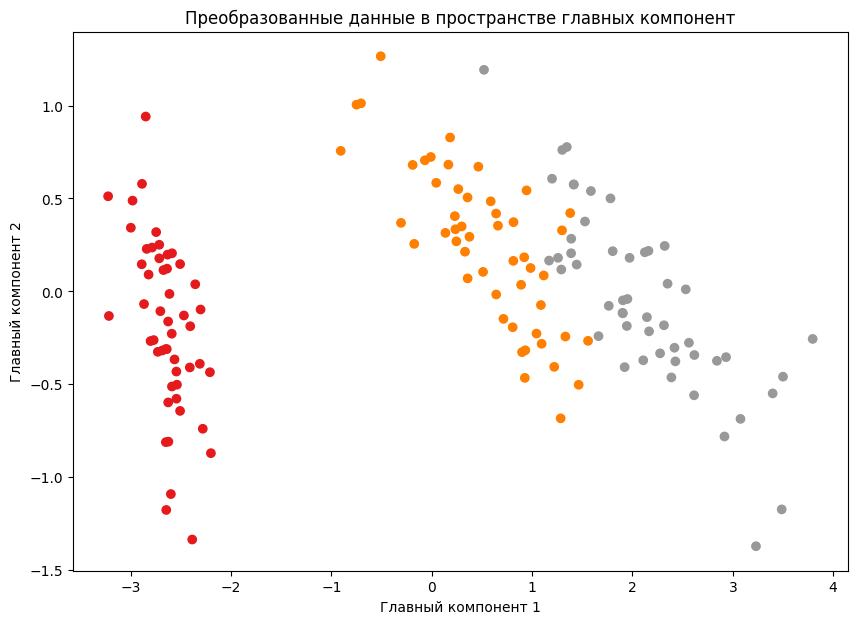

In [8]:
# Визуализация
plt.figure(figsize=(10, 7))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=iris.target, cmap='Set1')
plt.title('Преобразованные данные в пространстве главных компонент')
plt.xlabel('Главный компонент 1')
plt.ylabel('Главный компонент 2')
plt.show()

### Зачем нужен PCA?

PCA помогает уменьшить размерность данных, сохраняя важную информацию, что упрощает их визуализацию и анализ.
В нашем примере мы уменьшили размерность данных с четырех до двух признаков, выделив два главных компонента (PC1 и PC2).
Эти два компонента содержат максимальную возможную вариацию исходных данных, что позволяет более наглядно представить структуру данных и различия между видами ирисов.
Таким образом, PCA помогает нам понять внутреннюю структуру данных и выявить важные паттерны.

In [9]:
# Вывод оценок уменьшения размера данных
print(f"Размер данных до применения PCA: {original_size} байт")
print(f"Размер данных после применения PCA: {transformed_size} байт")
print(f"Уменьшение размера: {size_reduction} байт")
print(f"Процент уменьшения размера: {percentage_reduction:.2f}%")

Размер данных до применения PCA: 4800 байт
Размер данных после применения PCA: 2400 байт
Уменьшение размера: 2400 байт
Процент уменьшения размера: 50.00%
